In [1]:
# importer pandas

import pandas as pd

In [2]:
# importer la base 

df = pd.read_csv("donnees_marketing_banque.csv", sep =";")

In [3]:
# lire les données

df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,id1,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,id2,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,id3,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,id4,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,id5,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# les variables

df.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

- age: Age du client.

- job: Type de métier du client (ex. "manager", "blue-collar", "retired").|

- marital: État civil du client (ex. "married", "single", "divorced"). 

- education: Niveau d'études du client (ex. "secondary", "primary", "tertiary"). 

- default: Présence ou absence de défaut de palement de crédit (ex. "yes", "no*).

- balance: Solde annuel moyen sur le compte du client.

- housing: Présence ou absence de prêt immobilier (ex. "yes", "no").

- loan: Présence ou absence de prêt personnel (ex. 'yes", "no").

- contact: Moyen de communication avec le client (ex. "telephone", "celular", "unknown").

- day: Jour du mois de la demniére prise de contact. 

- month: Mois de l'année de la denière prise de contact.

- duration: Durée de la derière communication, en secondes.

- campaign: Nombre de contacts effectués pendant cetto sampagne pour ce client.

- pdays: Nombre de jours écoulés depuis le dernier contait du client lors d'une campagne précédente (999 indique que le client n'a pas été contacté précédemment).

- previous: Nombre de contacts réalisés avant cette campagne pour ce client.

- poutcone: Résultat de la campagne marketing précédente (ex. "failure", "nonexistent", "success").

- y: Le client a-t-i souscrit un dépot à terme ? (variable cible, ex. "yes", "no").


In [5]:
# le type des variables 

df.dtypes

id            object
age            int64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object

In [6]:
# la dimension

df.shape

(45211, 18)

on a 45211 clients et 18 variables

In [7]:
# verifions les données manquantes

df.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      5
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

on a 5 valeurs manquantes au niveau de la variable balance

In [8]:
# supprimons les valeurs manquantes

df_1 = df.dropna(axis = 0)


In [9]:
# verifions si on a encore des valeurs manquantes

df_1.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

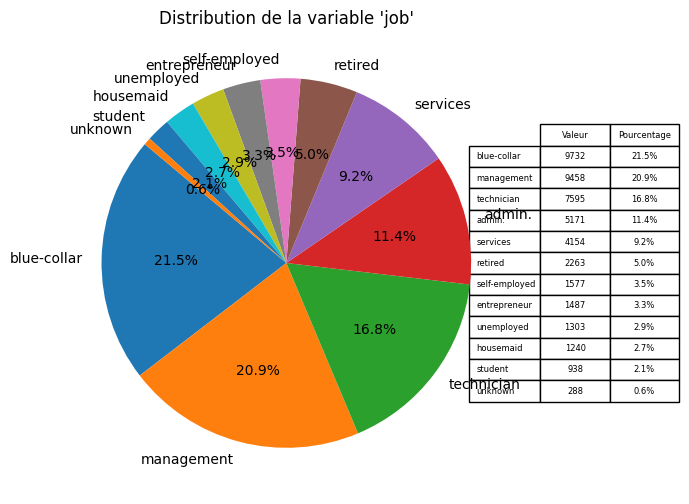

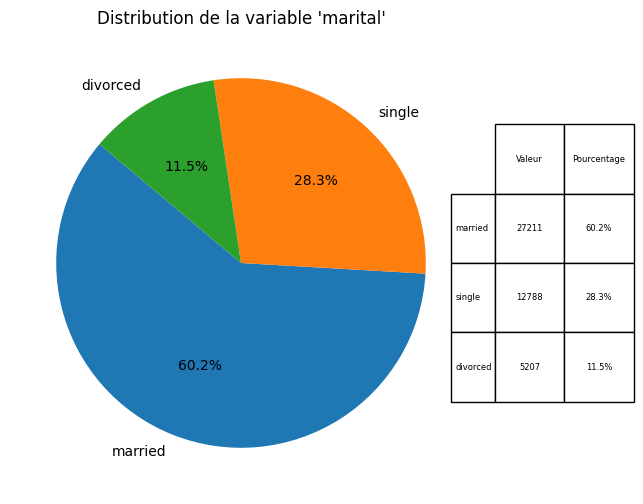

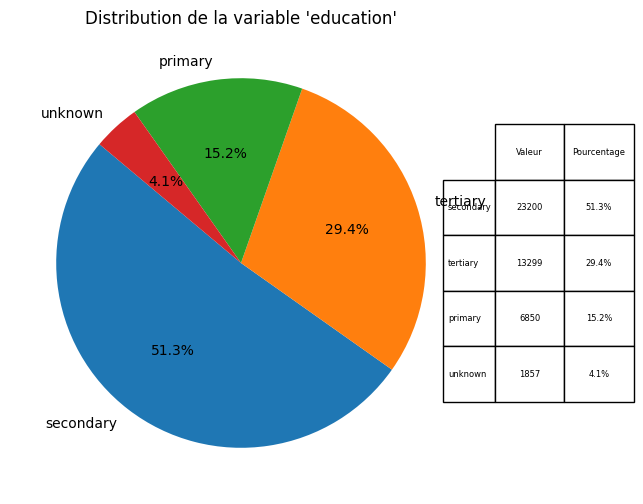

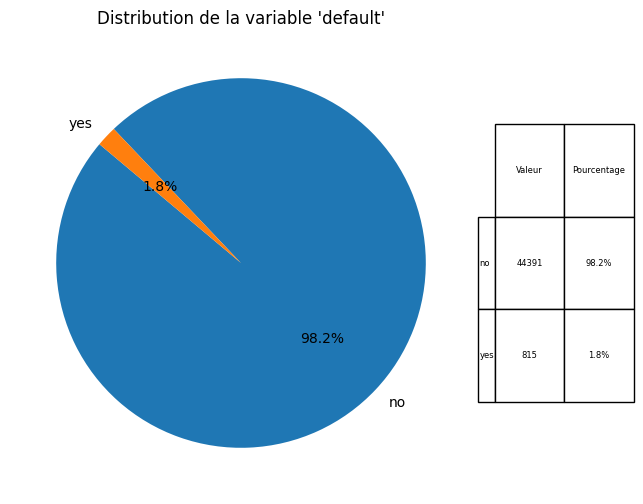

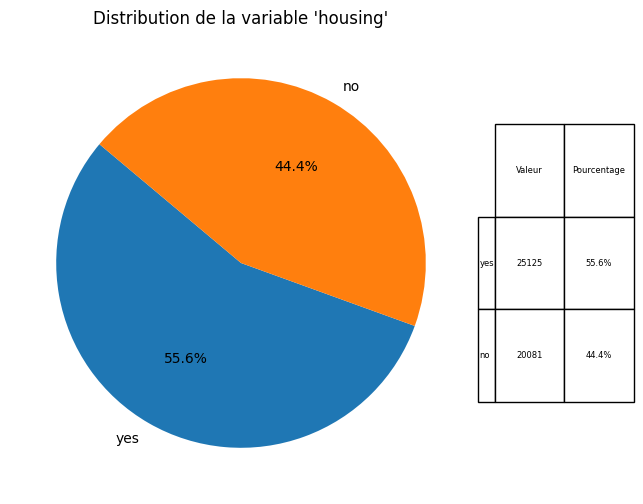

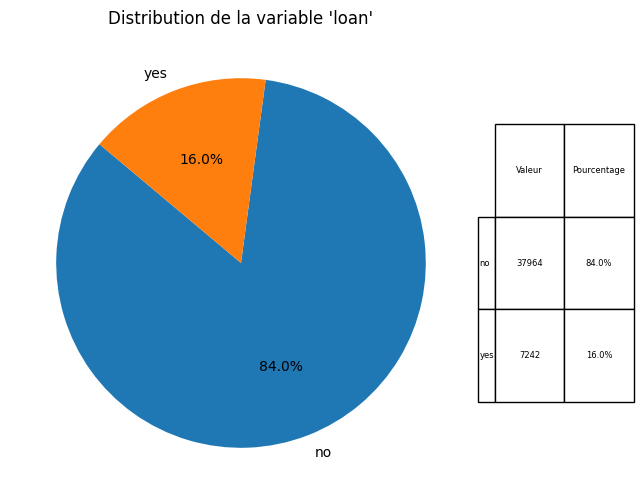

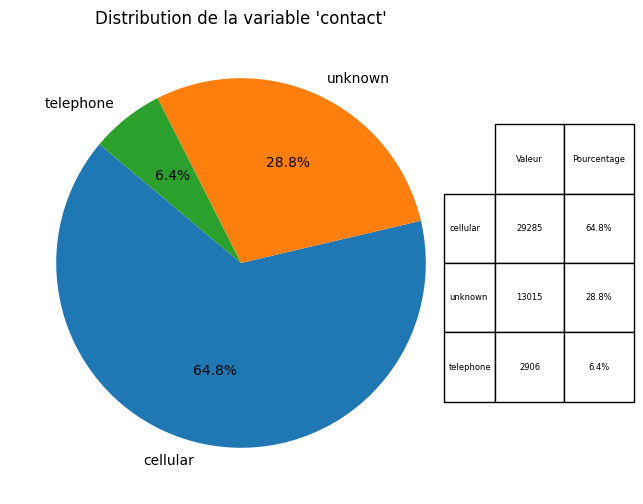

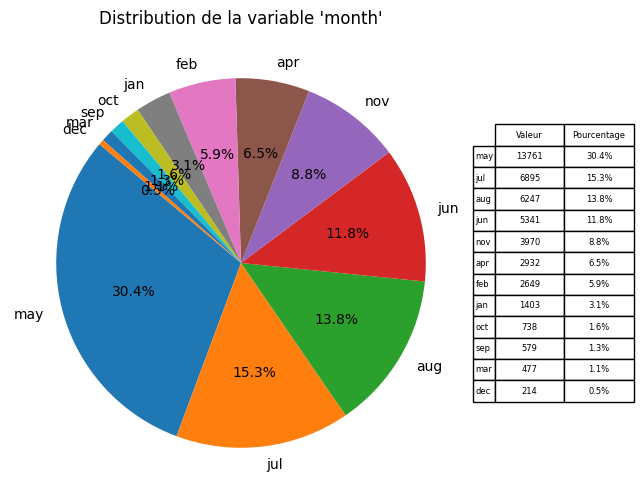

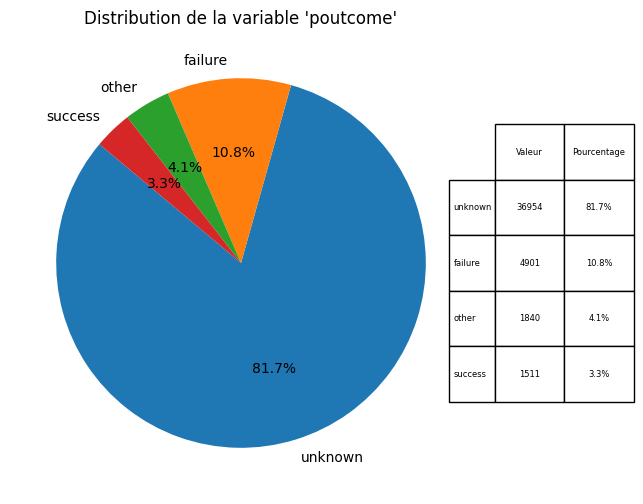

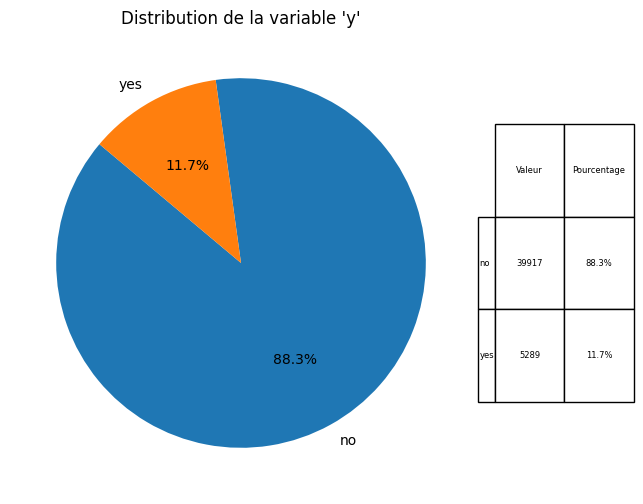

In [10]:
# regardons les modalités des variables qualitatives

import matplotlib.pyplot as plt

# Identification des colonnes qualitatives, sans la variable 'id'
qualitative_vars = df_1.select_dtypes(include=['object', 'category']).columns
qualitative_vars = [col for col in qualitative_vars if col != 'id']  # Exclusion de 'id'

# Création de graphiques circulaires pour chaque variable qualitative
for col in qualitative_vars:
    # Comptage des occurrences de chaque catégorie
    counts = df_1[col].value_counts()
    percentages = (counts / counts.sum()) * 100  # Calcul des pourcentages

    # Création d'une figure pour le graphique et le tableau
    fig, ax = plt.subplots(figsize=(14, 6))

    # Création du graphique circulaire
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f"Distribution de la variable '{col}'")

    # Création du tableau des valeurs et des pourcentages
    table_data = [[f"{val}", f"{pct:.1f}%"] for val, pct in zip(counts, percentages)]
    table = plt.table(cellText=table_data, 
                      colLabels=["Valeur", "Pourcentage"], 
                      rowLabels=counts.index, 
                      cellLoc='center', 
                      loc='right', 
                      bbox=[1.05, 0.2, 0.3, 0.6])  # Position et taille du tableau

    plt.show()

- Plus de la moitié des clients occupent des postes tels que : 21,5 % en tant qu'ouvriers, 21 % en management, 17 % comme techniciens et 11 % comme administrateurs. Les 30 % restants se répartissent sur d'autres types de postes.


- Parmi les clients, 60 % sont mariés, 29 % sont célibataires et 12 % sont divorcés.


- En ce qui concerne le niveau d'éducation des clients, 51 % ont un niveau secondaire, 30 % un niveau tertiaire, et 15 % un niveau primaire. Le reste est inconnu.


- En ce qui concerne la présence ou l'absence de défaut de paiement de crédit, 98 % des clients n'ont pas de défaut de paiement, tandis que 2 % en ont.


- En ce qui concerne la présence ou l'absence de prêt immobilier, 56 % des clients en possèdent un, tandis que 44 % n'en ont pas.


- En ce qui concerne la présence ou l'absence de prêt personnel, 84 % des clients n'en ont pas, tandis que 16 % en ont un.


- En ce qui concerne le moyen de communication avec les clients, 65 % utilisent un téléphone cellulaire, 6 % un téléphone fixe, et 29 % des cas sont inconnus.


- Pour les résultats de la campagne de marketing précédente, 3 % ont été un succès, 11 % un échec, 4 % ont eu d'autres résultats, et le reste est inconnu.


- En ce qui concerne la souscription à un dépôt à terme, 88 % des clients n'en ont pas souscrit, tandis que 12 % en ont souscrit un.

Statistiques descriptives pour la variable 'age':
count    45206.000000
mean        40.930828
std         10.623495
min         10.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

Skewness pour 'age': 0.68
Kurtosis pour 'age': 0.32



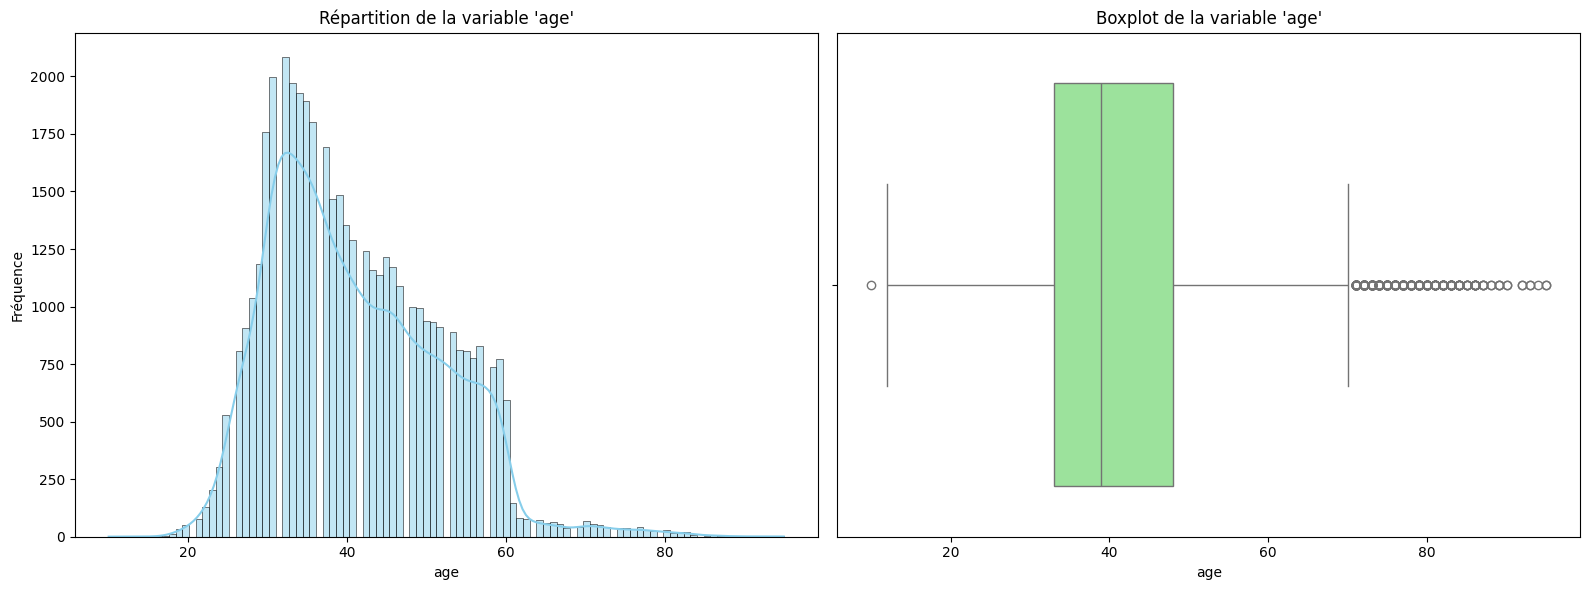

Statistiques descriptives pour la variable 'balance':
count     45206.000000
mean       1362.403707
std        3044.906741
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

Skewness pour 'balance': 8.36
Kurtosis pour 'balance': 140.72



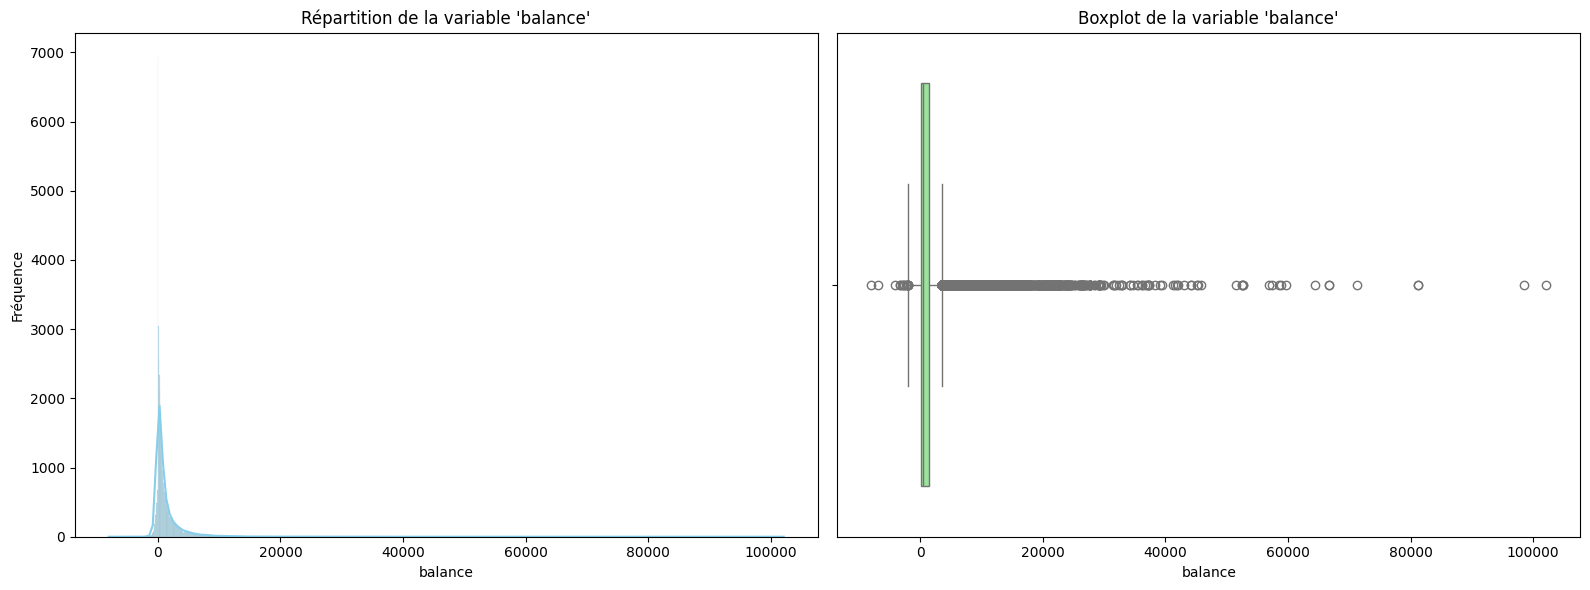

Statistiques descriptives pour la variable 'day':
count    45206.000000
mean        15.807614
std          8.322160
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

Skewness pour 'day': 0.09
Kurtosis pour 'day': -1.06



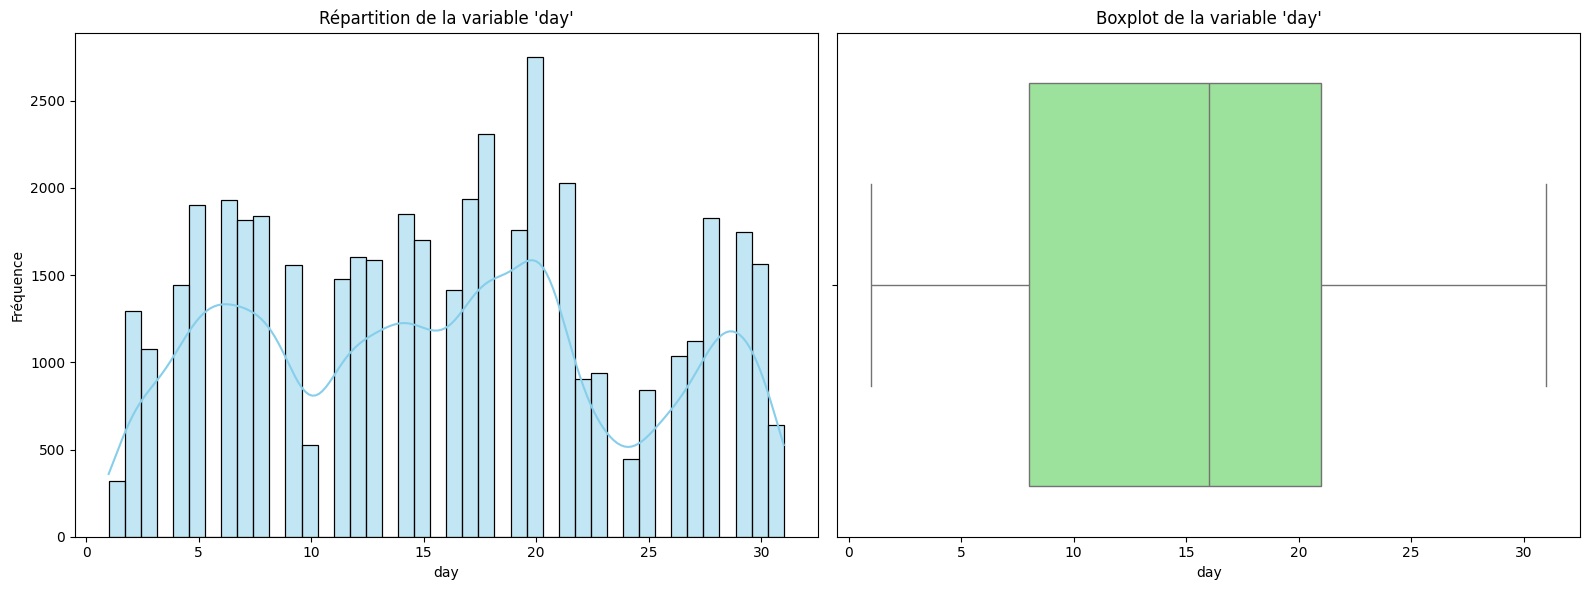

Statistiques descriptives pour la variable 'duration':
count    45206.000000
mean       258.161616
std        257.539139
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

Skewness pour 'duration': 3.14
Kurtosis pour 'duration': 18.15



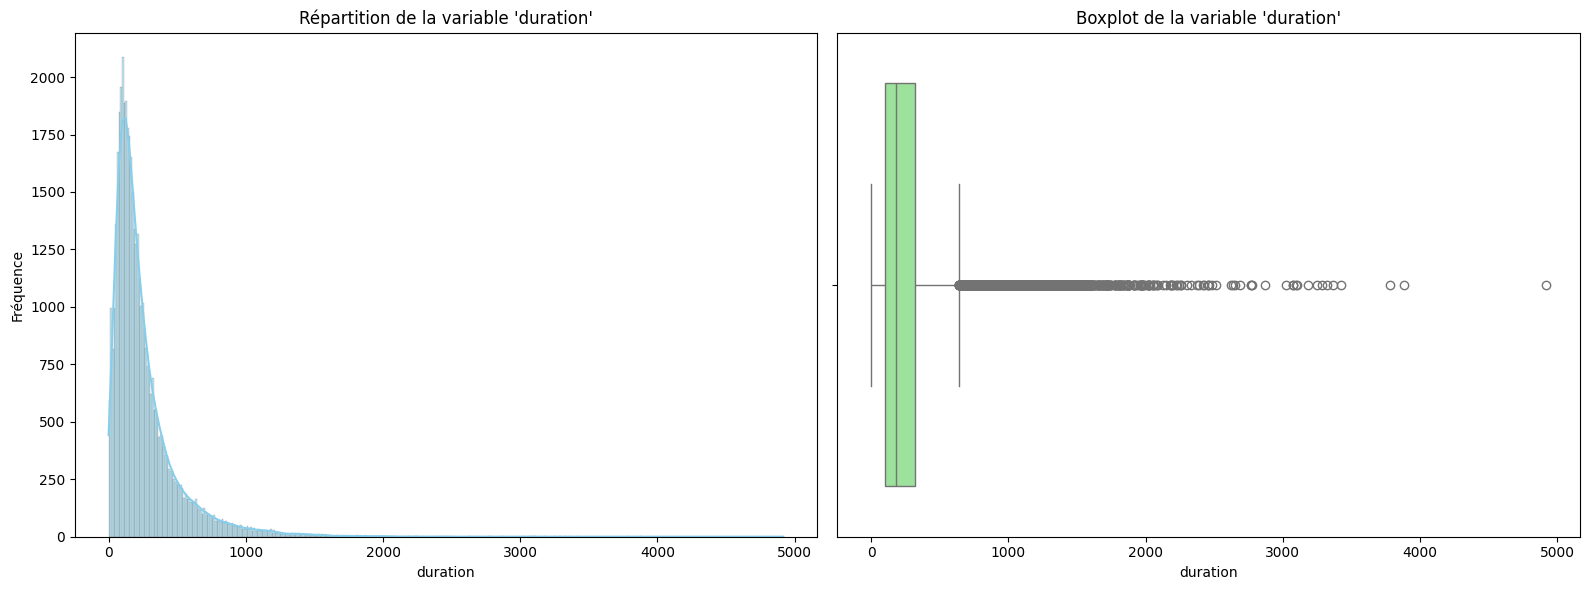

Statistiques descriptives pour la variable 'campaign':
count    45206.000000
mean         2.764036
std          3.098137
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

Skewness pour 'campaign': 4.90
Kurtosis pour 'campaign': 39.24



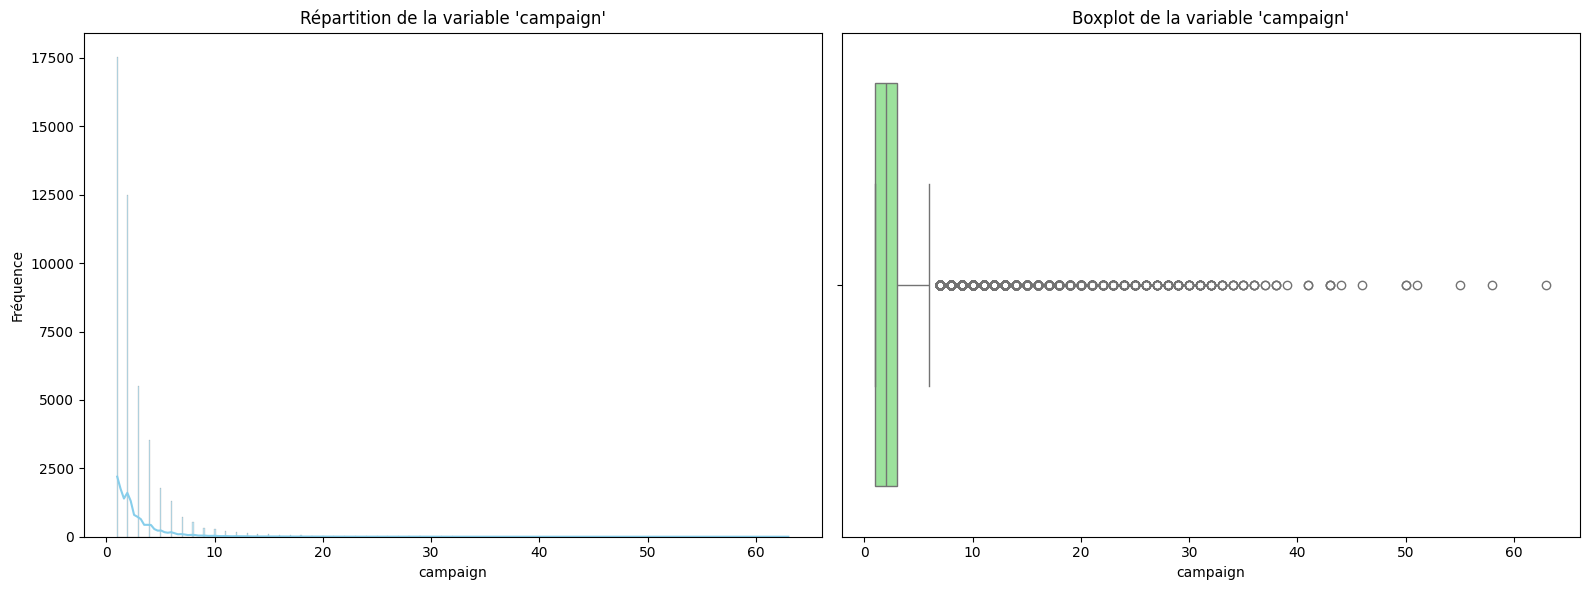

Statistiques descriptives pour la variable 'pdays':
count    45206.000000
mean        40.202385
std        100.133346
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

Skewness pour 'pdays': 2.62
Kurtosis pour 'pdays': 6.93



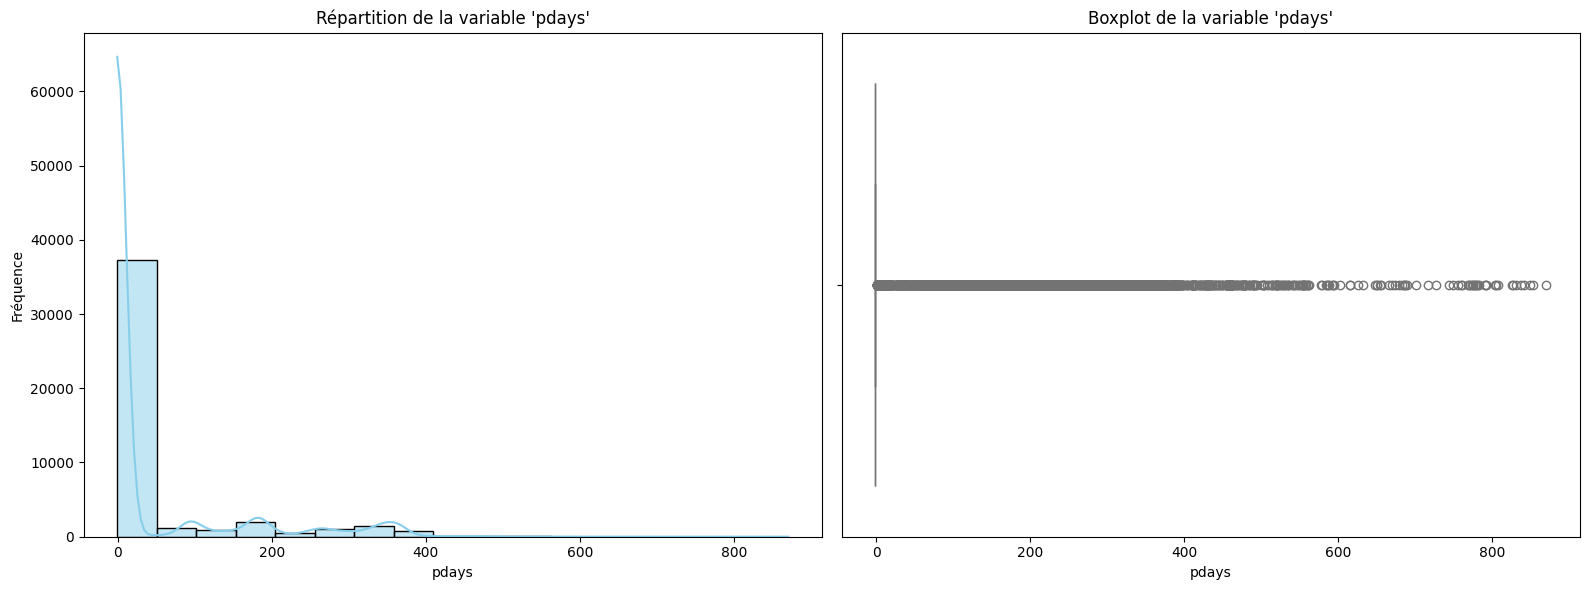

Statistiques descriptives pour la variable 'previous':
count    45206.000000
mean         0.580388
std          2.303560
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

Skewness pour 'previous': 41.84
Kurtosis pour 'previous': 4505.92



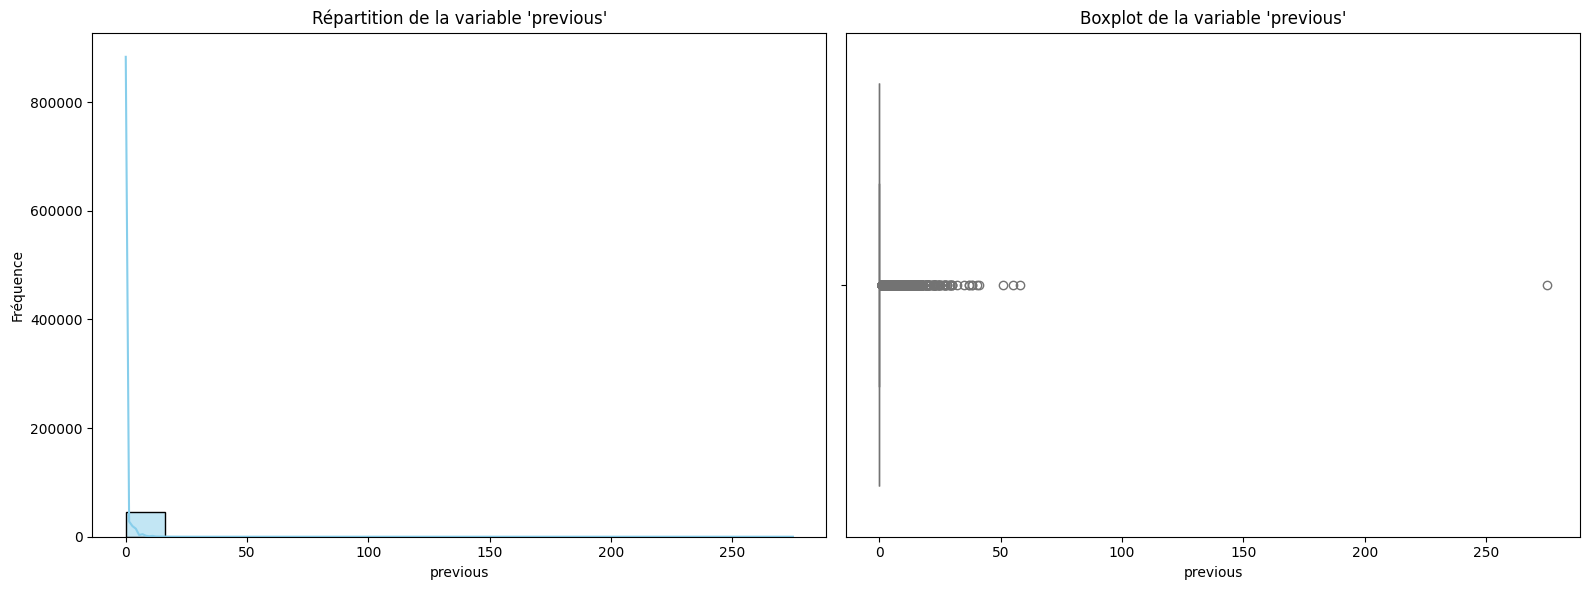

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Identification des colonnes quantitatives
quantitative_vars = df_1.select_dtypes(include=['number']).columns

# Création d'histogrammes et de boxplots pour chaque variable quantitative
for col in quantitative_vars:
    # Statistiques descriptives
    desc_stats = df_1[col].describe()
    print(f"Statistiques descriptives pour la variable '{col}':\n{desc_stats}\n")
    
    # Calcul de la skewness et du kurtosis
    skewness_value = skew(df_1[col])
    kurtosis_value = kurtosis(df_1[col])
    print(f"Skewness pour '{col}': {skewness_value:.2f}")
    print(f"Kurtosis pour '{col}': {kurtosis_value:.2f}\n")
    
    # Création d'une figure avec deux sous-graphiques
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Histogramme de la répartition avec KDE
    sns.histplot(df_1[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f"Répartition de la variable '{col}'")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Fréquence')
    
    # Boxplot de la variable
    sns.boxplot(x=df_1[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f"Boxplot de la variable '{col}'")
    
    plt.tight_layout()  # Ajuste l'espacement entre les sous-graphiques
    plt.show()


aucune variable n'est normalement distribuée, passons a la transformation logarithmique


- L'échantillon présente une large gamme d'âges, allant des jeunes (10 ans) aux personnes âgées (95 ans). La distribution des âges semble relativement équilibrée, mais l'écart-type élevé indique une certaine variabilité. La médiane proche de la moyenne suggère que la répartition des âges n'est pas trop biaisée. 


- Les clients ont des soldes très variés, allant de soldes négatifs (-8 019) à soldes très élevés (102 127). La moyenne (1 362,40) est influencée par les valeurs extrêmes, tandis que la médiane (448) est plus faible, indiquant que la majorité des clients ont des soldes plus modestes. L'écart-type élevé montre une grande dispersion des soldes.


- Les durées des communications varient considérablement, avec la majorité des communications étant relativement courtes (moins de 3 minutes), mais certaines peuvent être exceptionnellement longues, comme le montre la valeur maximale de 82 minutes. La médiane (180 secondes) est bien plus faible que la moyenne (258 secondes), ce qui suggère que la distribution est légèrement biaisée par les valeurs extrêmes


- La majorité des clients ont eu entre 1 et 3 contacts, mais il y a une petite proportion de clients qui ont été contactés de façon beaucoup plus fréquente, allant jusqu'à 63 contacts. La moyenne (2,76) est légèrement plus élevée que la médiane (2), ce qui suggère que quelques clients ont été contactés beaucoup plus souvent que la plupart.


- La majorité des clients n'ont eu aucun contact avant cette campagne, ce qui explique que la moyenne soit proche de 0. Cependant, certains clients ont été contactés plusieurs fois avant cette campagne, avec un maximum de 275 contacts, ce qui génère une grande dispersion dans les données.

In [12]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Préparation des données
# Supposons que df_1 est votre DataFrame et que 'target' est la colonne de la variable cible binaire
X = df1.drop(columns=['y'])  # Remplacez 'target' par le nom de votre variable cible
y = df1['y']  # Remplacez 'target' par le nom de votre variable cible

# Séparation des variables quantitatives et qualitatives
quantitative_vars = X.select_dtypes(include=['number']).columns
qualitative_vars = X.select_dtypes(exclude=['number']).columns

# 2. Traitement des variables qualitatives et quantitatives

# Pipeline pour les variables quantitatives : imputation (si nécessaire) + standardisation
quant_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputation des valeurs manquantes
    ('scaler', StandardScaler())  # Standardisation des données
])

# Pipeline pour les variables qualitatives : imputation + encodage one-hot
qual_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputation des valeurs manquantes
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Encodage One-Hot
])

# Création du transformateur qui applique les pipelines aux bonnes colonnes
preprocessor = ColumnTransformer(
    transformers=[
        ('quant', quant_pipeline, quantitative_vars),
        ('qual', qual_pipeline, qualitative_vars)
    ])

# 3. Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Application du prétraitement sur les données d'entraînement et de test
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 4. Entraînement des modèles
# Modèle de Régression Logistique avec un nombre d'itérations augmenté
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_processed, y_train)

# Prédictions sur l'ensemble de test
y_pred_logreg = logreg_model.predict(X_test_processed)

# Évaluation du modèle de régression logistique
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_report = classification_report(y_test, y_pred_logreg)
logreg_conf_matrix = confusion_matrix(y_test, y_pred_logreg)

# Modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train)

# Prédictions sur l'ensemble de test
y_pred_rf = rf_model.predict(X_test_processed)

# Évaluation du modèle Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

# 5. Affichage des résultats
print("== Régression Logistique ==")
print(f"Accuracy: {logreg_accuracy:.4f}")
print("Classification Report:\n", logreg_report)
print("Confusion Matrix:\n", logreg_conf_matrix)

print("\n== Random Forest ==")
print(f"Accuracy: {rf_accuracy:.4f}")
print("Classification Report:\n", rf_report)
print("Confusion Matrix:\n", rf_conf_matrix)

# 6. Visualisation de la matrice de confusion
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
    plt.title(f'Matrice de Confusion - {model_name}')
    plt.xlabel('Prédictions')
    plt.ylabel('Vrais labels')
    plt.show()

# Visualisation des matrices de confusion pour les deux modèles
plot_confusion_matrix(logreg_conf_matrix, "Régression Logistique")
plot_confusion_matrix(rf_conf_matrix, "Random Forest")


NameError: name 'df1' is not defined

/Users/oumarkante/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


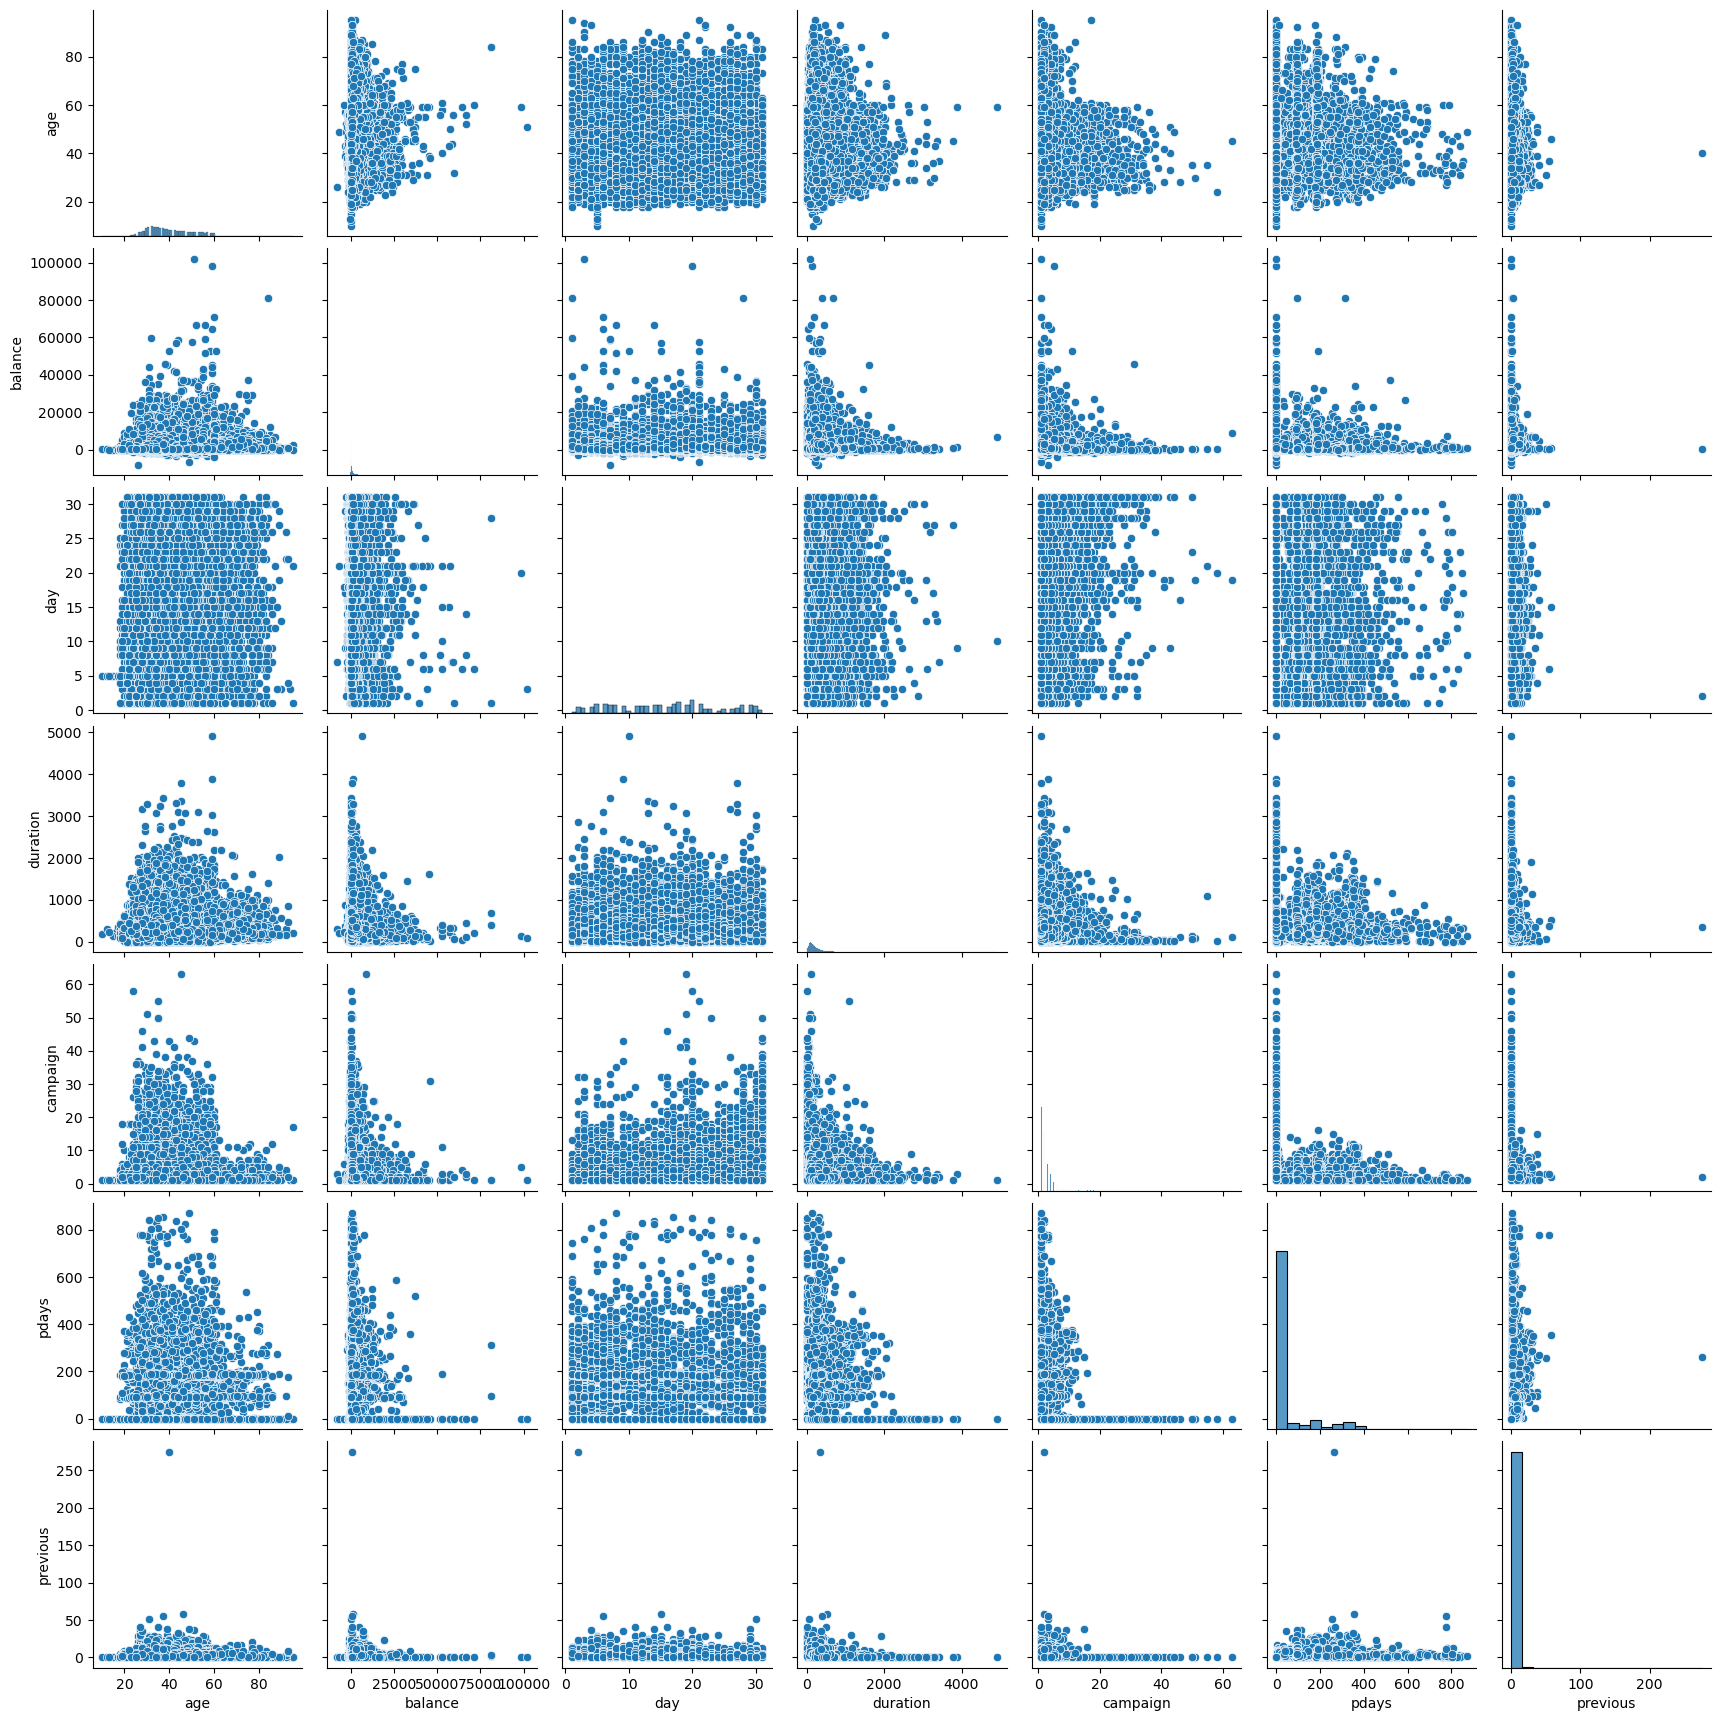

In [ ]:
# relation entre les variables quantitatives

sns.pairplot(df_1)

/Users/oumarkante/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


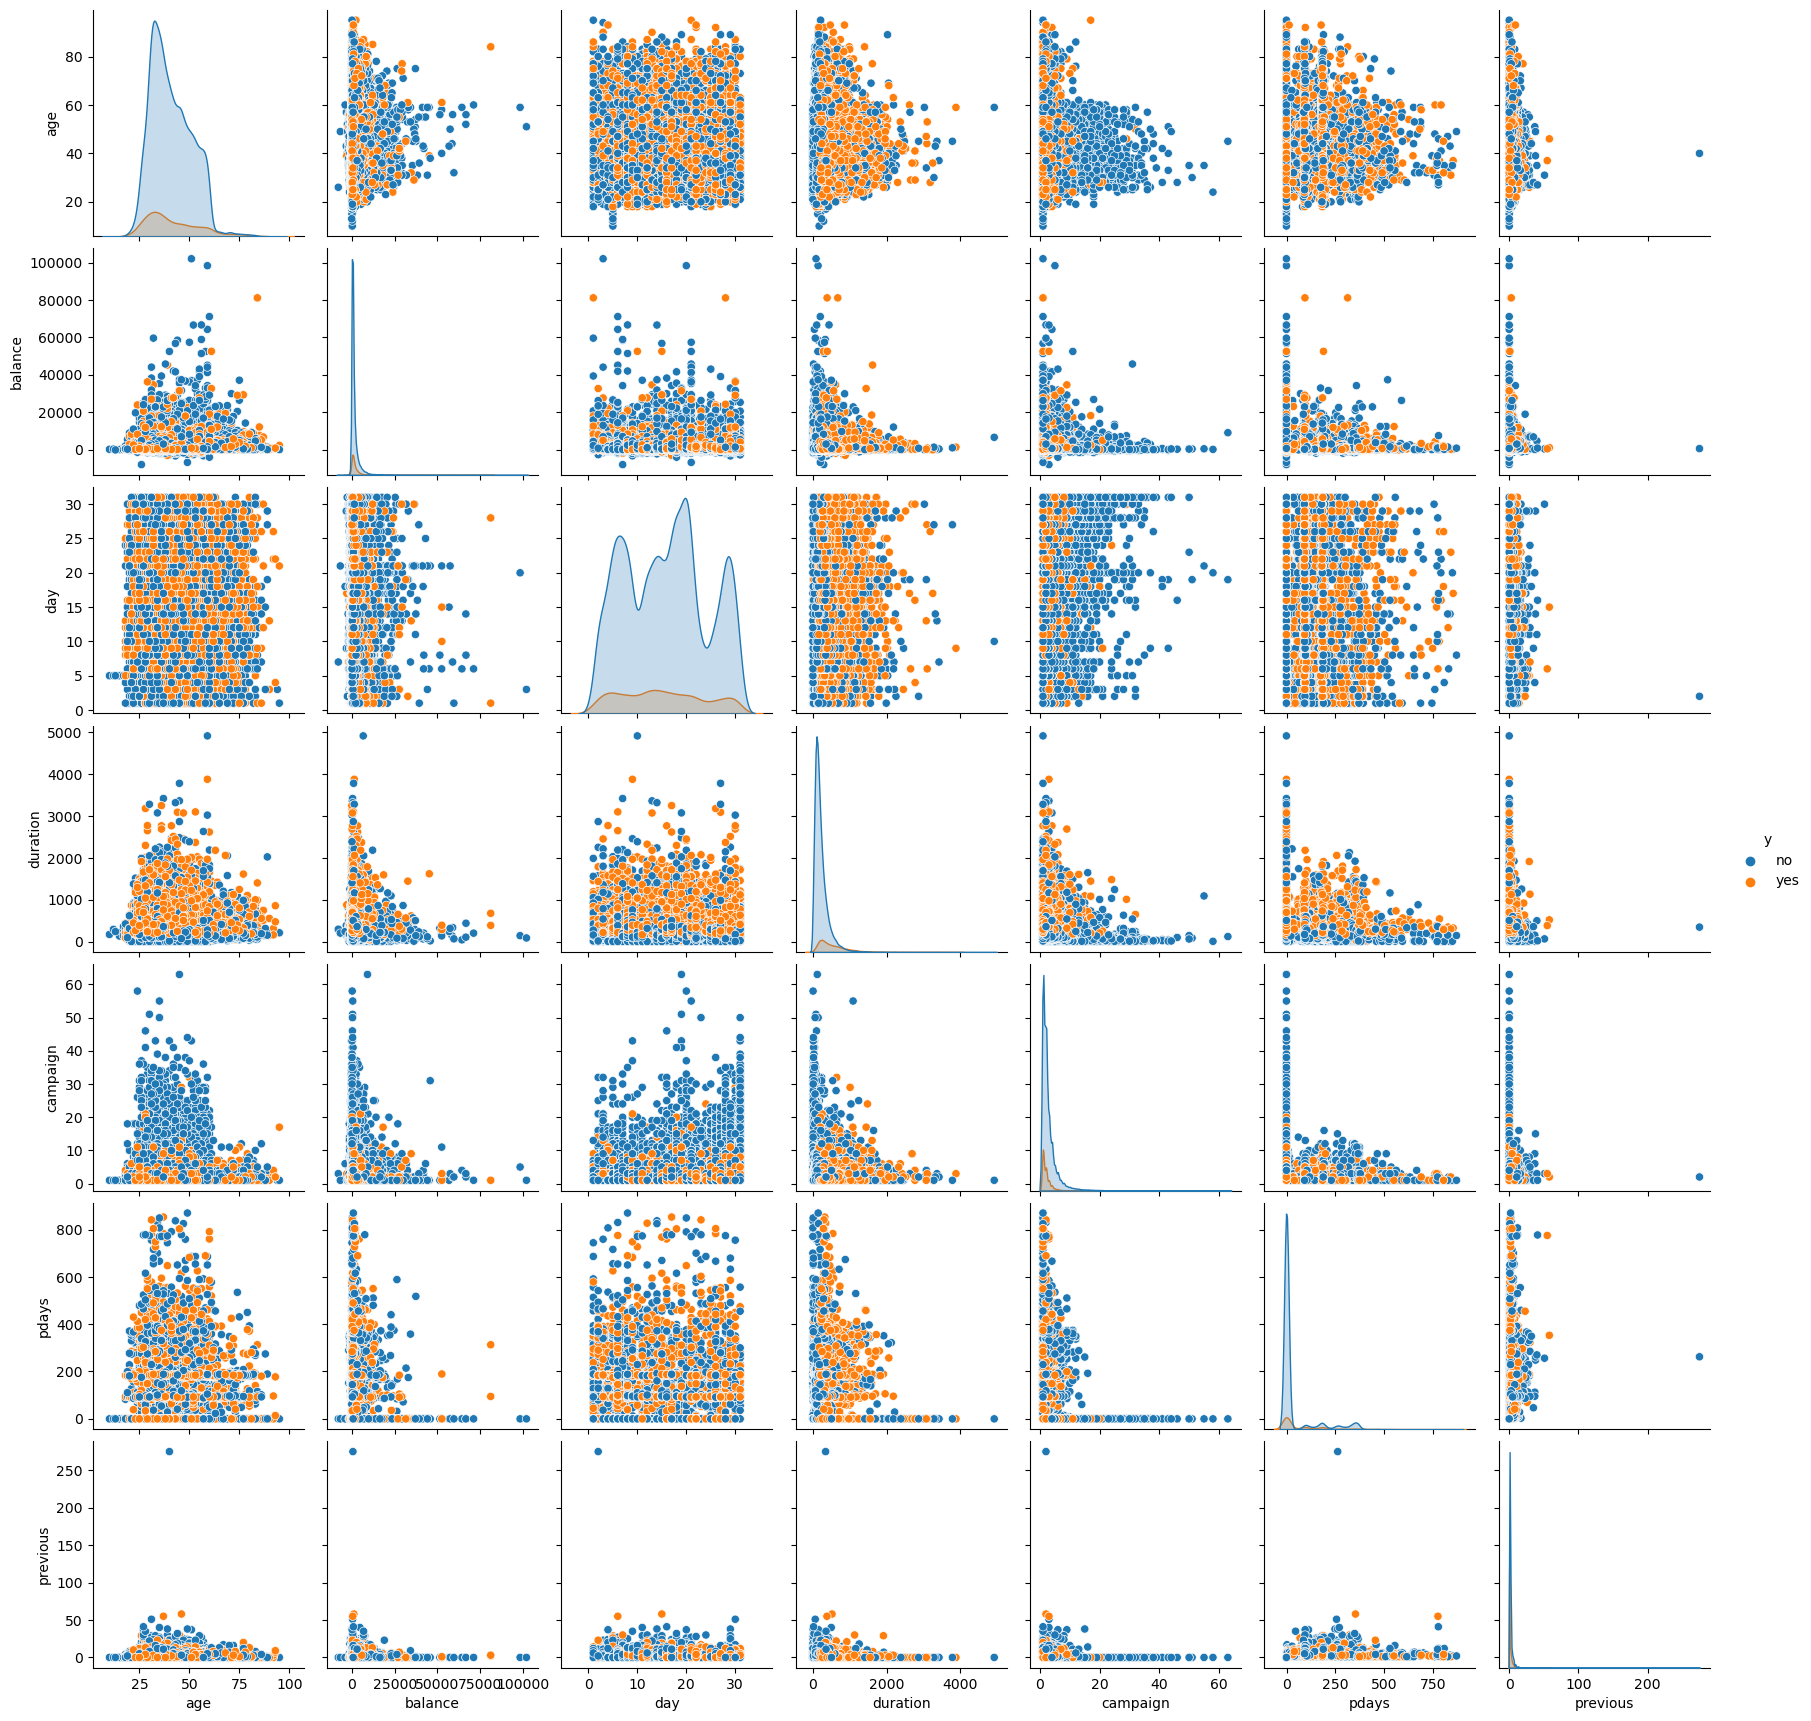

In [ ]:
sns.pairplot(df_1, hue = "y") 
# y est une variable qui a 2 modalité yes et no

In [ ]:
# etudions la corelation des variables numériques

correlation_matrix = df_1.select_dtypes(include=['float64', 'int64']).corr()
correlation_matrix

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097957,-0.008459,-0.004595,0.005047,-0.023540,0.001415
balance,0.097957,1.000000,0.004447,0.021567,-0.014603,0.003418,0.016663
day,-0.008459,0.004447,1.000000,-0.030202,0.162427,-0.093113,-0.051752
duration,-0.004595,0.021567,-0.030202,1.000000,-0.084569,-0.001562,0.001205
campaign,0.005047,-0.014603,0.162427,-0.084569,1.000000,-0.088656,-0.032872
pdays,-0.023540,0.003418,-0.093113,-0.001562,-0.088656,1.000000,0.454814
previous,0.001415,0.016663,-0.051752,0.001205,-0.032872,0.454814,1.000000


Il est évident qu’il n’y a pas de variables numériques fortement corrélées. Par conséquent, nous les conserverons toutes pour le modèle. \
Cependant, les colonnes jour et mois ne sont pas vraiment utiles, nous supprimerons ces deux colonnes.

In [ ]:
# supprimer les colonnes jour et mois
# supprimer les colonnes jour et mois


df1 = df_1[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']]
cols = df1.columns


In [ ]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825.0,no,no,cellular,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729.0,no,no,cellular,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715.0,no,no,cellular,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668.0,no,no,telephone,508,4,-1,0,unknown,no


== Régression Logistique ==
Accuracy: 0.9015
Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.98      0.95     11963
         yes       0.66      0.33      0.44      1599

    accuracy                           0.90     13562
   macro avg       0.79      0.66      0.70     13562
weighted avg       0.89      0.90      0.89     13562

Confusion Matrix:
 [[11692   271]
 [ 1065   534]]

== Random Forest ==
Accuracy: 0.8973
Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.97      0.94     11963
         yes       0.61      0.35      0.45      1599

    accuracy                           0.90     13562
   macro avg       0.76      0.66      0.70     13562
weighted avg       0.88      0.90      0.89     13562

Confusion Matrix:
 [[11603   360]
 [ 1033   566]]


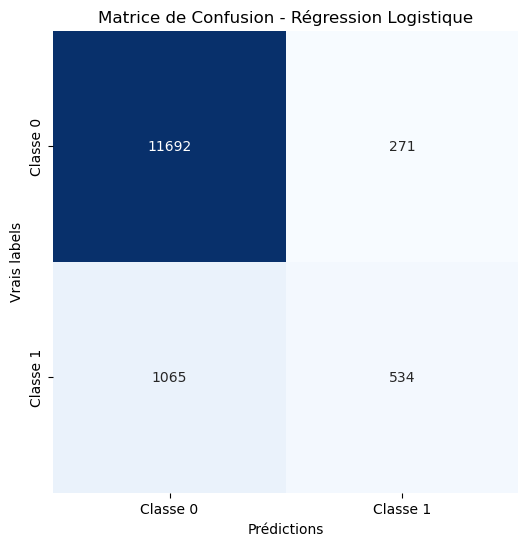

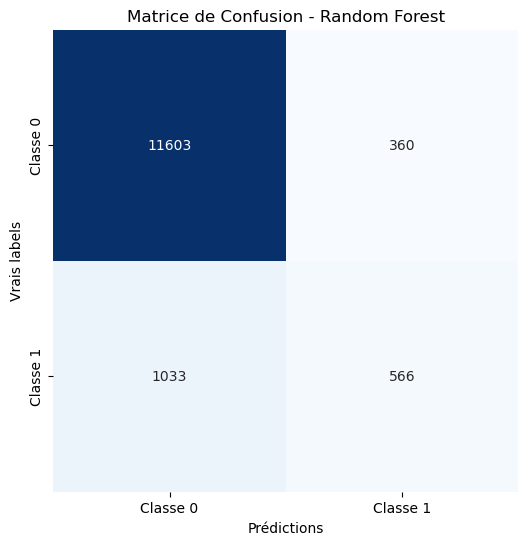

In [ ]:
# 1. Préparation des données
# Supposons que df_1 est votre DataFrame et que 'target' est la colonne de la variable cible binaire
X = df1.drop(columns=['y'])  # Remplacez 'target' par le nom de votre variable cible
y = df1['y']  # Remplacez 'target' par le nom de votre variable cible

# Séparation des variables quantitatives et qualitatives
quantitative_vars = X.select_dtypes(include=['number']).columns
qualitative_vars = X.select_dtypes(exclude=['number']).columns

# 2. Traitement des variables qualitatives et quantitatives

# Pipeline pour les variables quantitatives : imputation (si nécessaire) + standardisation
quant_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputation des valeurs manquantes
    ('scaler', StandardScaler())  # Standardisation des données
])

# Pipeline pour les variables qualitatives : imputation + encodage one-hot
qual_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputation des valeurs manquantes
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Encodage One-Hot
])

# Création du transformateur qui applique les pipelines aux bonnes colonnes
preprocessor = ColumnTransformer(
    transformers=[
        ('quant', quant_pipeline, quantitative_vars),
        ('qual', qual_pipeline, qualitative_vars)
    ])

# 3. Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Application du prétraitement sur les données d'entraînement et de test
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 4. Entraînement des modèles
# Modèle de Régression Logistique avec un nombre d'itérations augmenté
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_processed, y_train)

# Prédictions sur l'ensemble de test
y_pred_logreg = logreg_model.predict(X_test_processed)

# Évaluation du modèle de régression logistique
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_report = classification_report(y_test, y_pred_logreg)
logreg_conf_matrix = confusion_matrix(y_test, y_pred_logreg)

# Modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train)

# Prédictions sur l'ensemble de test
y_pred_rf = rf_model.predict(X_test_processed)

# Évaluation du modèle Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

# 5. Affichage des résultats
print("== Régression Logistique ==")
print(f"Accuracy: {logreg_accuracy:.4f}")
print("Classification Report:\n", logreg_report)
print("Confusion Matrix:\n", logreg_conf_matrix)

print("\n== Random Forest ==")
print(f"Accuracy: {rf_accuracy:.4f}")
print("Classification Report:\n", rf_report)
print("Confusion Matrix:\n", rf_conf_matrix)

# 6. Visualisation de la matrice de confusion
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
    plt.title(f'Matrice de Confusion - {model_name}')
    plt.xlabel('Prédictions')
    plt.ylabel('Vrais labels')
    plt.show()

# Visualisation des matrices de confusion pour les deux modèles
plot_confusion_matrix(logreg_conf_matrix, "Régression Logistique")
plot_confusion_matrix(rf_conf_matrix, "Random Forest")

In [ ]:
#  regroupement des catégories de 'job' en 4 groupes
def regroup_job(job):
    if job in ['blue-collar', 'technician', 'services', 'housemaid']:
        return 'Travailleurs manuels'
    elif job in ['management', 'entrepreneur', 'self employed']:
        return ' Cadres'
    elif job in ['admin', 'student']:
        return ' Administratifs'
    elif job in ['retired', 'unemployed', 'unknown']:
        return 'Autres'
    else:
        return 'Inconnu'

# Appliquer la fonction directement sur la colonne 'job' et mettre à jour les valeurs
df_1['job'] = df_1['job'].apply(regroup_job)

# Afficher le DataFrame résultant
print(df_1)

            id  age                   job   marital  education default  \
0          id1   58                Cadres   married   tertiary      no   
1          id2   44  Travailleurs manuels    single  secondary      no   
2          id3   33                Cadres   married  secondary      no   
3          id4   47  Travailleurs manuels   married    unknown      no   
4          id5   33                Autres    single    unknown      no   
...        ...  ...                   ...       ...        ...     ...   
45206  id45207   51  Travailleurs manuels   married   tertiary      no   
45207  id45208   71                Autres  divorced    primary      no   
45208  id45209   72                Autres   married  secondary      no   
45209  id45210   57  Travailleurs manuels   married  secondary      no   
45210  id45211   37                Cadres   married  secondary      no   

       balance housing loan    contact  day month  duration  campaign  pdays  \
0       2143.0     yes   no    

/var/folders/bj/pbl9fd796hb0y73mb2sjph0h0000gn/T/ipykernel_81629/2481326966.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['job'] = df_1['job'].apply(regroup_job)


/var/folders/bj/pbl9fd796hb0y73mb2sjph0h0000gn/T/ipykernel_81629/809098417.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['job'] = df_1['job'].replace(remplacements_job).astype('category')


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,id1,58,2,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,id2,44,1,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,id3,33,2,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,id4,47,1,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,id5,33,4,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,id45207,51,1,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,id45208,71,4,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,id45209,72,4,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,id45210,57,1,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no


/var/folders/bj/pbl9fd796hb0y73mb2sjph0h0000gn/T/ipykernel_81629/3746745657.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['education'] = df_1['education'].replace(remplacements_education).astype('category')


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,id1,58,2,married,2,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,id2,44,1,single,1,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,id3,33,2,married,1,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,id4,47,1,married,4,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,id5,33,4,single,4,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,id45207,51,1,married,2,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,id45208,71,4,divorced,3,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,id45209,72,4,married,1,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,id45210,57,1,married,1,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no


/var/folders/bj/pbl9fd796hb0y73mb2sjph0h0000gn/T/ipykernel_81629/3530893509.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['marital'] = df_1['marital'].replace(remplacements_marital).astype('category')


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,id1,58,2,2,2,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,id2,44,1,1,1,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,id3,33,2,2,1,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,id4,47,1,2,4,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,id5,33,4,1,4,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,id45207,51,1,2,2,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,id45208,71,4,3,3,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,id45209,72,4,2,1,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,id45210,57,1,2,1,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no


/var/folders/bj/pbl9fd796hb0y73mb2sjph0h0000gn/T/ipykernel_81629/1811518941.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['housing'] = df_1['housing'].replace(remplacements_housing).astype('category')


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,id1,58,2,2,2,no,2143.0,1,no,unknown,5,may,261,1,-1,0,unknown,no
1,id2,44,1,1,1,no,29.0,1,no,unknown,5,may,151,1,-1,0,unknown,no
2,id3,33,2,2,1,no,2.0,1,yes,unknown,5,may,76,1,-1,0,unknown,no
3,id4,47,1,2,4,no,1506.0,1,no,unknown,5,may,92,1,-1,0,unknown,no
4,id5,33,4,1,4,no,1.0,0,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,id45207,51,1,2,2,no,825.0,0,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,id45208,71,4,3,3,no,1729.0,0,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,id45209,72,4,2,1,no,5715.0,0,no,cellular,17,nov,1127,5,184,3,success,yes
45209,id45210,57,1,2,1,no,668.0,0,no,telephone,17,nov,508,4,-1,0,unknown,no


/var/folders/bj/pbl9fd796hb0y73mb2sjph0h0000gn/T/ipykernel_81629/2667067623.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['loan'] = df_1['loan'].replace(remplacements_loan).astype('category')


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,id1,58,2,2,2,no,2143.0,1,0,unknown,5,may,261,1,-1,0,unknown,no
1,id2,44,1,1,1,no,29.0,1,0,unknown,5,may,151,1,-1,0,unknown,no
2,id3,33,2,2,1,no,2.0,1,1,unknown,5,may,76,1,-1,0,unknown,no
3,id4,47,1,2,4,no,1506.0,1,0,unknown,5,may,92,1,-1,0,unknown,no
4,id5,33,4,1,4,no,1.0,0,0,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,id45207,51,1,2,2,no,825.0,0,0,cellular,17,nov,977,3,-1,0,unknown,yes
45207,id45208,71,4,3,3,no,1729.0,0,0,cellular,17,nov,456,2,-1,0,unknown,yes
45208,id45209,72,4,2,1,no,5715.0,0,0,cellular,17,nov,1127,5,184,3,success,yes
45209,id45210,57,1,2,1,no,668.0,0,0,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
#

/var/folders/bj/pbl9fd796hb0y73mb2sjph0h0000gn/T/ipykernel_81629/1834659604.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['y'] = df_1['y'].replace(remplacements_loan).astype('category')


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,id1,58,2,2,2,no,2143.0,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,id2,44,1,1,1,no,29.0,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,id3,33,2,2,1,no,2.0,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,id4,47,1,2,4,no,1506.0,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,id5,33,4,1,4,no,1.0,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,id45207,51,1,2,2,no,825.0,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,id45208,71,4,3,3,no,1729.0,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,id45209,72,4,2,1,no,5715.0,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,id45210,57,1,2,1,no,668.0,0,0,telephone,17,nov,508,4,-1,0,unknown,0


/var/folders/bj/pbl9fd796hb0y73mb2sjph0h0000gn/T/ipykernel_81629/177120151.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['contact'] = df_1['contact'].replace(remplacements_contact).astype('category')


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,id1,58,2,2,2,no,2143.0,1,0,0,5,may,261,1,-1,0,unknown,0
1,id2,44,1,1,1,no,29.0,1,0,0,5,may,151,1,-1,0,unknown,0
2,id3,33,2,2,1,no,2.0,1,1,0,5,may,76,1,-1,0,unknown,0
3,id4,47,1,2,4,no,1506.0,1,0,0,5,may,92,1,-1,0,unknown,0
4,id5,33,4,1,4,no,1.0,0,0,0,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,id45207,51,1,2,2,no,825.0,0,0,1,17,nov,977,3,-1,0,unknown,1
45207,id45208,71,4,3,3,no,1729.0,0,0,1,17,nov,456,2,-1,0,unknown,1
45208,id45209,72,4,2,1,no,5715.0,0,0,1,17,nov,1127,5,184,3,success,1
45209,id45210,57,1,2,1,no,668.0,0,0,2,17,nov,508,4,-1,0,unknown,0


/var/folders/bj/pbl9fd796hb0y73mb2sjph0h0000gn/T/ipykernel_81629/1053688573.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['default'] = df_1['default'].replace(remplacements_default).astype('category')


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,id1,58,2,2,2,0,2143.0,1,0,0,5,may,261,1,-1,0,unknown,0
1,id2,44,1,1,1,0,29.0,1,0,0,5,may,151,1,-1,0,unknown,0
2,id3,33,2,2,1,0,2.0,1,1,0,5,may,76,1,-1,0,unknown,0
3,id4,47,1,2,4,0,1506.0,1,0,0,5,may,92,1,-1,0,unknown,0
4,id5,33,4,1,4,0,1.0,0,0,0,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,id45207,51,1,2,2,0,825.0,0,0,1,17,nov,977,3,-1,0,unknown,1
45207,id45208,71,4,3,3,0,1729.0,0,0,1,17,nov,456,2,-1,0,unknown,1
45208,id45209,72,4,2,1,0,5715.0,0,0,1,17,nov,1127,5,184,3,success,1
45209,id45210,57,1,2,1,0,668.0,0,0,2,17,nov,508,4,-1,0,unknown,0


/var/folders/bj/pbl9fd796hb0y73mb2sjph0h0000gn/T/ipykernel_81629/371454822.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['poutcome'] = df_1['poutcome'].replace(remplacements_poutcome).astype('category')


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,id1,58,2,2,2,0,2143.0,1,0,0,5,may,261,1,-1,0,1,0
1,id2,44,1,1,1,0,29.0,1,0,0,5,may,151,1,-1,0,1,0
2,id3,33,2,2,1,0,2.0,1,1,0,5,may,76,1,-1,0,1,0
3,id4,47,1,2,4,0,1506.0,1,0,0,5,may,92,1,-1,0,1,0
4,id5,33,4,1,4,0,1.0,0,0,0,5,may,198,1,-1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,id45207,51,1,2,2,0,825.0,0,0,1,17,nov,977,3,-1,0,1,1
45207,id45208,71,4,3,3,0,1729.0,0,0,1,17,nov,456,2,-1,0,1,1
45208,id45209,72,4,2,1,0,5715.0,0,0,1,17,nov,1127,5,184,3,4,1
45209,id45210,57,1,2,1,0,668.0,0,0,2,17,nov,508,4,-1,0,1,0
